In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

from utils import plotCase, loadDataSet, selectTrainingSamples, calcConfusionMatrix, calcAccuracy, plotResultDots, plotResultsOCR, tanhprim
from classifiers import trainMultiLayer, runMultiLayer

plt.rcParams['figure.facecolor']='white'

In [34]:
# This script will help you test your single layer neural network code
# Select which data to use:

# 1 = dot cloud 1
# 2 = dot cloud 2
# 3 = dot cloud 3
# 4 = OCR data

dataSetNr = 3; # Change this to load new data

# X - Data samples
# D - Desired output from classifier for each sample
# L - Labels for each sample
X, D, L = loadDataSet(dataSetNr)

In [35]:
# Select a subset of the training samples
numBins = 2                        # Number of bins you want to divide your data into
numSamplesPerLabelPerBin = np.inf  # Number of samples per label per bin, set to inf for max number (total number is numLabels*numSamplesPerBin)
selectAtRandom = True              # true = select samples at random, false = select the first features

# Split data into bins based on the settings above.
# The outputs are lists of length numBins, where each item is a data array. Try printing for example XBins[0].shape.
XBins, DBins, LBins = selectTrainingSamples(X, D, L, numSamplesPerLabelPerBin, numBins, selectAtRandom)

# To extract a single bin from them use e.g.:
# XBin0 = XBins[0]
# Or to combine several bins into one matrix (good for cross validataion), use the numpy function concatenate:
# XBinComb = np.concatenate(XBins[0:4])
# This example combines 4 bins, nr 0 to 3.

# Add your own code to setup data for training and test here
XTrain = XBins[0]
DTrain = DBins[0]
LTrain = LBins[0]
XTest  = XBins[1]
DTest  = DBins[1]
LTest  = LBins[1]

In [36]:
# Modify the X Matrices so that a bias is added
# Note that the bias must be the last feature for the plot code to work

# The training data
XTrain = np.concatenate((XTrain, np.ones([XTrain.shape[0],1])), axis=1)

# The test data
XTest = np.concatenate((XTest, np.ones([XTest.shape[0],1])), axis=1)

In [37]:
XTrain.shape

(999, 3)

In [38]:
XTest.shape

(999, 3)

In [39]:
LTrain.shape

(999,)

In [40]:
DTrain.shape

(999, 3)

In [44]:
# Train your multi layer network
# Note: You need to modify trainMultiLayer() and runMultiLayer() in classifiers.py in order to train the network
if dataSetNr == 4:
    numHidden = 32          # Change this, number of hidden neurons
    numIterations = 10000    # Change this, number of iterations (epochs)
    learningRate  = 0.001  # Change this, your learning rate

    np.random.seed(10)
    W0 = np.random.normal(loc=0.0, scale=1/numHidden, size = (XTrain.shape[1],numHidden))                 # Initialize your weight matrix W
    W0 = np.hstack((W0,np.zeros([W0.shape[0],1], W0.dtype)))
    V0 = np.random.normal(loc=0.0, scale=1/numHidden, size = (numHidden+1,DTrain.shape[1]))                 # Initialize your weight matrix V

    # Run training loop
    W, V, ErrTrain, ErrTest = trainMultiLayer(XTrain, DTrain, XTest, DTest ,W0, V0, numIterations, learningRate)

if dataSetNr <3:
    if dataSetNr == 1 or dataSetNr == 2:
        numHidden = 15 # Change this, number of hidden neurons
        numIterations = 20000    # Change this, number of iterations (epochs)
        learningRate  = 0.001  # Change this, your learning rate

        W0 = np.random.rand(XTrain.shape[1],numHidden)                 # Initialize your weight matrix W
        V0 = np.random.rand(numHidden,len(np.unique(LTrain)))                 # Initialize your weight matrix V

        # Run training loop
        W, V, ErrTrain, ErrTest = trainMultiLayer(XTrain, DTrain, XTest, DTest ,W0, V0, numIterations, learningRate)
    
    else:
        numHidden = 25 # Change this, number of hidden neurons
        numIterations = 20000    # Change this, number of iterations (epochs)
        learningRate  = 0.001  # Change this, your learning rate

        np.random.seed(10)
        W0 = np.random.rand(XTrain.shape[1],numHidden)                 # Initialize your weight matrix W
        V0 = np.random.rand(numHidden,len(np.unique(LTrain)))                 # Initialize your weight matrix V

        # Run training loop
        W, V, ErrTrain, ErrTest = trainMultiLayer(XTrain, DTrain, XTest, DTest ,W0, V0, numIterations, learningRate)

Text(0, 0.5, 'Error')

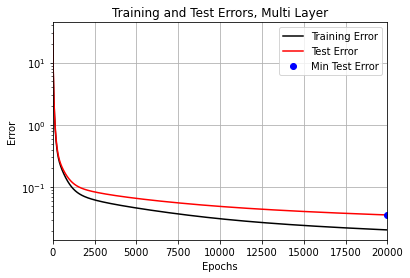

In [42]:
# Plot errors
# Note: You should not have to modify this code

# [minErrTest, minErrTestInd] = min(ErrTest);
minErrTest = ErrTest.min()
minErrTestInd = ErrTest.argmin()

plt.figure()

plt.semilogy(ErrTrain, 'k', linewidth=1.5, label='Training Error')
plt.semilogy(ErrTest, 'r', linewidth=1.5, label='Test Error')
plt.semilogy(minErrTestInd, minErrTest, 'bo', linewidth=1.5, label='Min Test Error')

plt.xlim([0,numIterations])
plt.grid('on')
plt.title('Training and Test Errors, Multi Layer')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')

In [43]:
# Calculate the Confusion Matrix and the Accuracy of the data
# Note: you have to modify the calcConfusionMatrix() and calcAccuracy() functions in utils.py yourself.

_, LPredTrain, _ = runMultiLayer(XTrain, W, V)
_, LPredTest , _ = runMultiLayer(XTest , W, V)

# The confusion matrix
cM = calcConfusionMatrix(LPredTest, LTest)

# The accuracy
acc = calcAccuracy(cM)

# Print the results
print("Confusion matrix:")
print(cM)
print(f'Accuracy: {acc:.4f}')

Confusion matrix:
[[ 79. 254.   0.]
 [ 57. 276.   0.]
 [234.  99.   0.]]
Accuracy: 35.5355


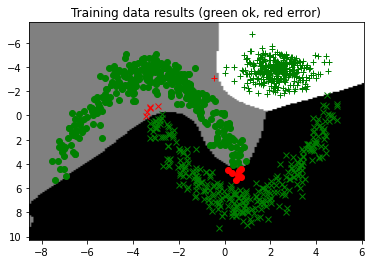

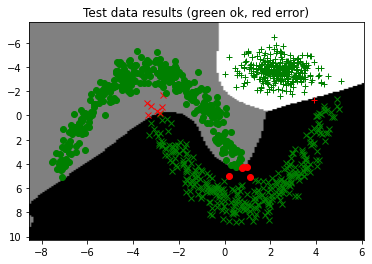

In [55]:
# Plot classifications
# Note: You should not have to modify this code

if dataSetNr < 4:
    plotResultDots(XTrain, LTrain, LPredTrain, XTest, LTest, LPredTest, 'multi', [W, V], [])
else:
    plotResultsOCR(XTest, LTest, LPredTest)